# RUN ONLY THE FIRST BLOCK BELOW AND MOVE TO START HERE IF DATABASE IS CONSTRUCTED

In [2]:
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String
from sqlalchemy import inspect
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as tik
import numpy as np
engine = create_engine('sqlite:////home/stephen/Desktop/EDA/Project_V2/mta_data_jup_v2.db')
insp = inspect(engine)
print(insp.get_table_names())




['filtered_data', 'mta_data']


In [3]:
#pd.read_sql('DROP TABLE filtered_data;', engine)

Create a new column in mta_data called "UNIQUE_ID"

In [4]:
pd.read_sql('ALTER TABLE mta_data ADD COLUMN UNIQUE_ID TEXT;', engine)

OperationalError: (sqlite3.OperationalError) duplicate column name: UNIQUE_ID
[SQL: ALTER TABLE mta_data ADD COLUMN UNIQUE_ID TEXT;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

Create a new column in mta_data called "UNIQUE_ST"

In [ ]:
pd.read_sql('ALTER TABLE mta_data ADD COLUMN UNIQUE_ST TEXT;', engine)

In [ ]:
# for column in insp.get_columns('mta_data'):
#     print('Columns: {}'.format(column['name']))

Update the "UNIQUE_ID" column with a id containing the "C/A", "UNIT", and "SCP" columns concatenated together.

In [ ]:
pd.read_sql('UPDATE mta_data SET UNIQUE_ID = (mta_data."C/A"|| " " || mta_data.UNIT ||" "|| mta_data.SCP);', engine)

Update the "UNIQUE_ST" column with a id containing the "STATION" and "LINENAME" columns concatenated together.

In [ ]:
pd.read_sql('UPDATE mta_data SET UNIQUE_ST = (mta_data.STATION|| " " || mta_data.LINENAME);', engine)

This code removes the rows from the database table mta_data where the decription of the data is considered recovered, or erronious.

In [ ]:
pd.read_sql('DELETE FROM mta_data WHERE DESC = "RECOVR AUD";', engine)

In [ ]:
df = pd.read_sql('SELECT*FROM mta_data;', engine)
df.head(5)

Create a new table called "filtered_data" with specified fields.

In [ ]:
#pd.read_sql('DROP TABLE filtered_data;', engine)

In [ ]:
pd.read_sql('CREATE TABLE filtered_data ("C/A" TEXT, UNIT TEXT, SCP TEXT, STATION TEXT, "DATE" TEXT, "TIME" TEXT, UNIQUE_ST TEXT, NET_ENTRIES INTEGER,NET_EXITS INTEGER);', engine)

Populate the "filter_data" table with new information "NET_ENTRIES" and "NET_EXITS". This function uses the SQL LAG command with ordering clauses to do the calculation (New_number_entries - previous_number_entries). Also reapplies the "UNIQUE_ID" column.

In [ ]:
pd.read_sql('INSERT INTO filtered_data SELECT "C/A", UNIT, SCP, STATION, "DATE", "TIME", UNIQUE_ST, ENTRIES - LAG(ENTRIES,1) OVER(ORDER BY UNIQUE_ID, "DATE") Net_entries, EXITS - LAG(EXITS,1) OVER(ORDER BY UNIQUE_ID, "DATE") Net_exits FROM mta_data ORDER BY UNIQUE_ID, "DATE";', engine)

In [ ]:
pd.read_sql('ALTER TABLE filtered_data ADD COLUMN UNIQUE_ID TEXT;', engine)

In [ ]:
pd.read_sql('UPDATE filtered_data SET UNIQUE_ID = (filtered_data."C/A"|| " " || filtered_data.UNIT ||" "|| filtered_data.SCP);', engine)

In [5]:
print(insp.get_table_names())

['filtered_data', 'mta_data']


# START HERE

Creates a dataframe that filters out the erroneous data points where the lag made a error transitioning from one station count to another.

In [6]:
df = pd.read_sql('SELECT * FROM filtered_data WHERE NET_ENTRIES BETWEEN 0 AND 20000 AND NET_EXITS BETWEEN 0 AND 20000;', engine)
df.head(30)

,C/A,UNIT,SCP,STATION,DATE,TIME,UNIQUE_ST,NET_ENTRIES,NET_EXITS,UNIQUE_ID
0,A002,R051,02-00-00,59 ST,03/27/2021,04:00:00,59 ST NQR456W,0,0,A002 R051 02-00-00
1,A002,R051,02-00-00,59 ST,03/27/2021,08:00:00,59 ST NQR456W,0,23,A002 R051 02-00-00
2,A002,R051,02-00-00,59 ST,03/27/2021,12:00:00,59 ST NQR456W,0,57,A002 R051 02-00-00
3,A002,R051,02-00-00,59 ST,03/27/2021,16:00:00,59 ST NQR456W,0,50,A002 R051 02-00-00
4,A002,R051,02-00-00,59 ST,03/27/2021,20:00:00,59 ST NQR456W,0,27,A002 R051 02-00-00
5,A002,R051,02-00-00,59 ST,03/28/2021,00:00:00,59 ST NQR456W,0,12,A002 R051 02-00-00
6,A002,R051,02-00-00,59 ST,03/28/2021,04:00:00,59 ST NQR456W,0,6,A002 R051 02-00-00
7,A002,R051,02-00-00,59 ST,03/28/2021,08:00:00,59 ST NQR456W,0,9,A002 R051 02-00-00
8,A002,R051,02-00-00,59 ST,03/28/2021,12:00:00,59 ST NQR456W,0,31,A002 R051 02-00-00
9,A002,R051,02-00-00,59 ST,03/28/2021,16:00:00,59 ST NQR456W,65,37,A002 R051 02-00-00


This code block makes a deep copy of the dataframe from the SQL database.

In [7]:
df_clean = df.copy(deep = True)

Here a mask is created to select 12:00am and 4:00am. The inverse of the mask is applied to the clean dataframe df to remove those timeseries.

In [8]:
mask = ((df_clean['TIME'] == '00:00:00') | (df_clean['TIME'] == '04:00:00'))
df_clean = df_clean[~mask]


This block is cleaning up certain "LINENAMES" that have contradicting formating.

In [9]:
df_clean.loc[df_clean['UNIQUE_ST'] == '14 ST-UNION SQ 456LNQRW', 'UNIQUE_ST'] = '14 ST-UNION SQ LNQR456W'
df_clean.loc[df_clean['UNIQUE_ST'] == 'ATL AV-BARCLAY 2345BDNQR', 'UNIQUE_ST'] = 'ATL AV-BARCLAY BDNQR2345'
df_clean.loc[df_clean['UNIQUE_ST'] == 'FULTON ST 2345ACJZ', 'UNIQUE_ST'] = 'FULTON ST ACJZ2345'
df_clean.loc[df_clean['UNIQUE_ST'] == '161/YANKEE STAD 4BD', 'UNIQUE_ST'] = '161/YANKEE STAD BD4'
df_clean.loc[df_clean['UNIQUE_ST'] == '59 ST 456NQRW', 'UNIQUE_ST'] = '59 ST NQR456W'
df_clean.loc[df_clean['UNIQUE_ST'] == '59 ST COLUMBUS 1ABCD', 'UNIQUE_ST'] = '59 ST COLUMBUS ABCD1'
df_clean.loc[df_clean['UNIQUE_ST'] == 'TIMES SQ-42 ST 1237ACENQRSW', 'UNIQUE_ST'] = 'TIMES SQ-42 ST ACENQRS1237W'
df_clean.loc[df_clean['UNIQUE_ST'] == '168 ST 1AC', 'UNIQUE_ST'] = '168 ST AC1'
df_clean.loc[df_clean['UNIQUE_ST'] == '14 ST 123FLM', 'UNIQUE_ST'] = '14 ST FLM123'

This code is sorting the newly created dataframe by "UNIQUE_ST" and "DATE" to summarize the net entries and net exits at every station by date.

In [10]:
df_clean = df_clean.groupby(['UNIQUE_ST', 'DATE'], as_index=False)[['NET_ENTRIES', 'NET_EXITS']].sum().sort_values(['UNIQUE_ST', 'DATE'])
mate_df = df_clean.copy(deep = True)
df_clean.tail(20)

,UNIQUE_ST,DATE,NET_ENTRIES,NET_EXITS
72086,ZEREGA AV 6,08/08/2021,489,682
72087,ZEREGA AV 6,08/09/2021,1022,1407
72088,ZEREGA AV 6,08/10/2021,1132,1483
72089,ZEREGA AV 6,08/11/2021,1186,1409
72090,ZEREGA AV 6,08/12/2021,1112,1383
72091,ZEREGA AV 6,08/13/2021,1120,1368
72092,ZEREGA AV 6,08/14/2021,642,839
72093,ZEREGA AV 6,08/15/2021,553,795
72094,ZEREGA AV 6,08/16/2021,959,1271
72095,ZEREGA AV 6,08/17/2021,1095,1375


This function takes in a date column and converts the string to a day of the week. I.E. 3/27/2021 = 'Saturday'

In [11]:
def day_of_week(data):
    dt = data
    month, day, year = (int(x) for x in dt.split('/'))    
    ans = datetime.date(year, month, day)
    return(ans.strftime("%A"))

Here the day_of_week function is being called to create a column called "DAYS" holding the day of week information.

In [12]:
df_clean['DAYS']= df_clean['DATE'].apply(day_of_week)

This code is creating a mask that selects the days Saturday and Sunday. The inverse of the mask is applied to the dataframe to remove Saturday and Sunday from the analysis.

In [13]:
mask = ((df_clean['DAYS'] == 'Saturday') | (df_clean['DAYS'] == 'Sunday'))
df_clean = df_clean[~mask]
df_clean.head(20)

,UNIQUE_ST,DATE,NET_ENTRIES,NET_EXITS,DAYS
2,1 AV L,03/29/2021,5130,8599,Monday
3,1 AV L,03/30/2021,5762,9268,Tuesday
4,1 AV L,03/31/2021,5588,9189,Wednesday
5,1 AV L,04/01/2021,5498,7677,Thursday
6,1 AV L,04/02/2021,5357,7931,Friday
9,1 AV L,04/05/2021,5374,8779,Monday
10,1 AV L,04/06/2021,5580,9440,Tuesday
11,1 AV L,04/07/2021,5642,9475,Wednesday
12,1 AV L,04/08/2021,5996,9818,Thursday
13,1 AV L,04/09/2021,6161,10418,Friday


Here the dataframe is condensed to show the net entries and net exists at each station+linename by day of the week.

In [14]:
df_clean = df_clean.groupby(['UNIQUE_ST', 'DAYS'], as_index = False)[['NET_ENTRIES', 'NET_EXITS']].mean().round(0).sort_values(['UNIQUE_ST', 'DAYS'])
df_clean[['NET_ENTRIES', 'NET_EXITS']] = df_clean[['NET_ENTRIES', 'NET_EXITS']].astype(int)
df_mean_tot = df_clean.copy(deep=True)
df_mean_day = df_clean.copy(deep=True)
df_clean.head(20)

,UNIQUE_ST,DAYS,NET_ENTRIES,NET_EXITS
0,1 AV L,Friday,6559,11618
1,1 AV L,Monday,5769,9933
2,1 AV L,Thursday,6420,11159
3,1 AV L,Tuesday,6306,10914
4,1 AV L,Wednesday,6442,11091
5,103 ST 1,Friday,4509,3478
6,103 ST 1,Monday,4001,3111
7,103 ST 1,Thursday,4553,3446
8,103 ST 1,Tuesday,4385,3384
9,103 ST 1,Wednesday,4516,3454


This code takes the deep copy created earlier and summarizes the "POPULATION" column by UNIQUE_ST rather than day of the week to get the average traffic over a five months period. This is sorted so the largest populations are located at the top of the dataframe.

In [15]:
df_mean_tot['POPULATION'] = df_mean_tot["NET_ENTRIES"] + df_mean_tot["NET_EXITS"]
df_mean_tot = df_mean_tot.groupby('UNIQUE_ST', as_index = False)['POPULATION'].sum().sort_values('POPULATION',ascending=False)
df_mean_tot.head(5)

,UNIQUE_ST,POPULATION
304,GRD CNTRL-42 ST 4567S,369686
85,34 ST-HERALD SQ BDFMNQRW,350252
26,14 ST-UNION SQ LNQR456W,327813
295,FULTON ST ACJZ2345,252711
98,42 ST-PORT AUTH ACENQRS1237W,244268


This function formats y-axis ticks to change 1,000,000 to 1.0M

In [16]:
def format_tick(data,idx):
    if data >= 1000000:
        formatter = '{:1.1f}M'.format(data/1000000)
    elif data > 1000:
        formatter = '{:1.0f}K'.format(data/1000)
    else:
        formatter = data   
    return formatter

This creates a bar graph that shows the average traffic per station over a five month period.

[244268, 252711, 327813, 350252, 369686]


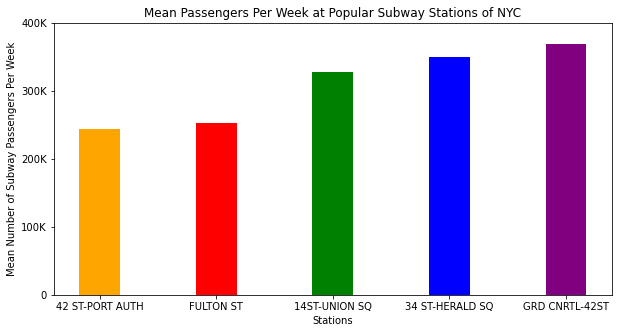

In [17]:
labels = ['42 ST-PORT AUTH', 'FULTON ST', '14ST-UNION SQ', '34 ST-HERALD SQ', 'GRD CNRTL-42ST']
width = 0.35  
height = sorted(list(df_mean_tot['POPULATION'][0:5]))
print(height)

fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(labels, height, width, color=['orange', 'red', 'green', 'blue', 'purple'])

ax.set_xlabel("Stations")
ax.set_ylabel("Mean Number of Subway Passengers Per Week")
ax.set_title("Mean Passengers Per Week at Popular Subway Stations of NYC")
ax.set_yticks(np.arange(0,500000,100000))
ax.yaxis.set_major_formatter(tik.FuncFormatter(format_tick))
plt.savefig('popular_stations.png')

A column "POPULATION" is added to the dataframe that is the average of net entries and net exits on a day of the week basis.

In [18]:
df_mean_day['POPULATION'] = df_mean_day.NET_ENTRIES + df_mean_day.NET_EXITS

df_mean_day.head(5)

,UNIQUE_ST,DAYS,NET_ENTRIES,NET_EXITS,POPULATION
0,1 AV L,Friday,6559,11618,18177
1,1 AV L,Monday,5769,9933,15702
2,1 AV L,Thursday,6420,11159,17579
3,1 AV L,Tuesday,6306,10914,17220
4,1 AV L,Wednesday,6442,11091,17533


Filters the dataframe to cantact the five most trafficed stations/line by days of the week.

In [19]:
df_mean_day = df_mean_day[(df_mean_day.UNIQUE_ST == 'GRD CNTRL-42 ST 4567S') | (df_mean_day.UNIQUE_ST == '34 ST-HERALD SQ BDFMNQRW') |\
          (df_mean_day.UNIQUE_ST == '14 ST-UNION SQ LNQR456W')| (df_mean_day.UNIQUE_ST == 'FULTON ST ACJZ2345') | (df_mean_day.UNIQUE_ST == '42 ST-PORT AUTH ACENQRS1237W')]
df_mean_day.head(35)

,UNIQUE_ST,DAYS,NET_ENTRIES,NET_EXITS,POPULATION
130,14 ST-UNION SQ LNQR456W,Friday,29074,40497,69571
131,14 ST-UNION SQ LNQR456W,Monday,24745,33930,58675
132,14 ST-UNION SQ LNQR456W,Thursday,28042,38236,66278
133,14 ST-UNION SQ LNQR456W,Tuesday,27409,37499,64908
134,14 ST-UNION SQ LNQR456W,Wednesday,29004,39377,68381
425,34 ST-HERALD SQ BDFMNQRW,Friday,28933,42790,71723
426,34 ST-HERALD SQ BDFMNQRW,Monday,27171,36782,63953
427,34 ST-HERALD SQ BDFMNQRW,Thursday,29592,42096,71688
428,34 ST-HERALD SQ BDFMNQRW,Tuesday,29976,41304,71280
429,34 ST-HERALD SQ BDFMNQRW,Wednesday,29931,41677,71608


This cells sorts the dataframe to find the most popular day of week to travel at the five most popular stations.

In [20]:
df_day_tot = df_mean_day.copy(deep = True)
df_day_tot = df_day_tot.groupby(['DAYS'], as_index = False)[['POPULATION']].sum().sort_values('POPULATION', ascending = False)
df_day_tot.head()

,DAYS,POPULATION
4,Wednesday,319441
2,Thursday,318423
0,Friday,314128
3,Tuesday,312813
1,Monday,279925


This code creates a key for the days of week to be sorted correctly. The data is then parsed into chunks by station and sorted into the proper order by day of the week. Next, a bar graph is created using the previously parsed information as the heights of the bars.

           DAYS  POPULATION
1520     Friday       71916
1521     Monday       66717
1522   Thursday       77490
1523    Tuesday       76364
1524  Wednesday       77199
          DAYS  POPULATION
425     Friday       71723
426     Monday       63953
427   Thursday       71688
428    Tuesday       71280
429  Wednesday       71608
          DAYS  POPULATION
130     Friday       69571
131     Monday       58675
132   Thursday       66278
133    Tuesday       64908
134  Wednesday       68381
           DAYS  POPULATION
1475     Friday       50611
1476     Monday       45351
1477   Thursday       52858
1478    Tuesday       51198
1479  Wednesday       52693
          DAYS  POPULATION
490     Friday       50307
491     Monday       45229
492   Thursday       50109
493    Tuesday       49063
494  Wednesday       49560


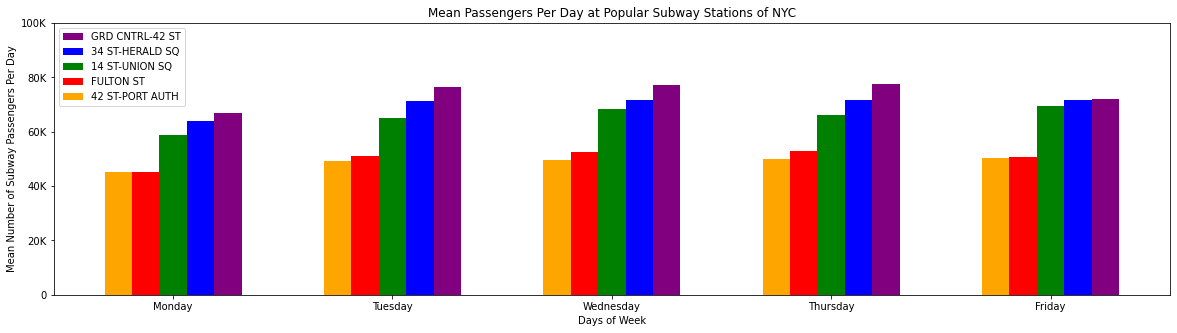

In [21]:
day_key = pd.Series(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])

st1 = df_mean_day[df_mean_day.UNIQUE_ST == 'GRD CNTRL-42 ST 4567S'].iloc[:, [1,4]]
st1 = st1.set_index('DAYS').reindex(day_key).reset_index()

st2 = df_mean_day[df_mean_day.UNIQUE_ST == '34 ST-HERALD SQ BDFMNQRW'].iloc[:, [1,4]]
st2 = st2.set_index('DAYS').reindex(day_key).reset_index()

st3 = df_mean_day[df_mean_day.UNIQUE_ST == '14 ST-UNION SQ LNQR456W'].iloc[:, [1,4]]
st3 = st3.set_index('DAYS').reindex(day_key).reset_index()

st4 = df_mean_day[df_mean_day.UNIQUE_ST == 'FULTON ST ACJZ2345'].iloc[:, [1,4]]
st4 = st4.set_index('DAYS').reindex(day_key).reset_index()

st5 = df_mean_day[df_mean_day.UNIQUE_ST == '42 ST-PORT AUTH ACENQRS1237W'].iloc[:, [1,4]]
st5 = st5.set_index('DAYS').reindex(day_key).reset_index()

x = np.arange(1,11,2)  
width = 0.25

fig, ax = plt.subplots(figsize = (20, 5))
station1 = ax.bar(x + 0.5, st1.iloc[:,1], width, label='GRD CNTRL-42 ST', color='purple')
station2 = ax.bar(x + 0.25, st2.iloc[:,1], width, label='34 ST-HERALD SQ', color='blue')
station3 = ax.bar(x + 0.00, st3.iloc[:,1], width, label='14 ST-UNION SQ', color='green')
station4 = ax.bar(x - 0.25, st4.iloc[:,1], width, label='FULTON ST', color='red')
station5 = ax.bar(x - 0.50, st5.iloc[:,1], width, label='42 ST-PORT AUTH', color='orange')

ax.set_xlabel('Days of Week')
ax.set_ylabel("Mean Number of Subway Passengers Per Day")
ax.set_title('Mean Passengers Per Day at Popular Subway Stations of NYC')
ax.set_xticks(x)
ax.set_xticklabels(day_key)
ax.legend(loc = 2)
ax.set_yticks(np.arange(0,120000,20000)) 
ax.yaxis.set_major_formatter(tik.FuncFormatter(format_tick))
plt.savefig('popular_stations_by_week.png')
print(df_mean_day[df_mean_day.UNIQUE_ST == 'GRD CNTRL-42 ST 4567S'].iloc[:, [1,4]])
print(df_mean_day[df_mean_day.UNIQUE_ST == '34 ST-HERALD SQ BDFMNQRW'].iloc[:, [1,4]])
print(df_mean_day[df_mean_day.UNIQUE_ST == '14 ST-UNION SQ LNQR456W'].iloc[:, [1,4]])
print(df_mean_day[df_mean_day.UNIQUE_ST == 'FULTON ST ACJZ2345'].iloc[:, [1,4]])
print(df_mean_day[df_mean_day.UNIQUE_ST == '42 ST-PORT AUTH ACENQRS1237W'].iloc[:, [1,4]])

--------------------------------------------------------------------------------------------------------------------



# New analysis: 

Temperature data was collected from https://www.ncdc.noaa.gov/cdo-web/search for the New York City area in the form of a .csv file. This data was parsed in excel to format it correctly for insertion into this project. The end result was date, temperature max and temperature min data recorded in Central Park. This data is over the exact same time period as the station data.



--------------------------------------------------------------------------------------------------------------------

In [22]:
temp_df = pd.read_csv('/home/stephen/Desktop/EDA/temp_data.csv')
print(temp_df)

           DATE  TMAX  TMIN
0    2021-03-27    69    50
1    2021-03-28    60    48
2    2021-03-29    55    45
3    2021-03-30    61    42
4    2021-03-31    67    50
..          ...   ...   ...
149  2021-08-23    83    71
150  2021-08-24    89    72
151  2021-08-25    91    72
152  2021-08-26    91    78
153  2021-08-27    93    75

[154 rows x 3 columns]


A new column was created in the dataframe for average temperature. This number was rounded off and turned into a integer for easier handling.

In [23]:
temp_df['TAVG'] = round((temp_df['TMAX'] + temp_df['TMIN'])/2,0)
temp_df['TAVG'] = temp_df['TAVG'].astype('int')
temp_df.sort_values('TAVG')

,DATE,TMAX,TMIN,TAVG
6,2021-04-02,39,28,34
26,2021-04-22,48,36,42
7,2021-04-03,53,32,42
20,2021-04-16,53,41,47
5,2021-04-01,58,38,48
...,...,...,...,...
153,2021-08-27,93,75,84
111,2021-07-16,91,79,85
139,2021-08-13,94,78,86
94,2021-06-29,95,78,86


This function will take the average temperature data and give it a category of human perception when outdoors.

In [24]:
def temp_range(data):
    if data < 40:
        return 'Freezing'
    elif data < 50:
        return 'Cold'
    elif data < 60:
        return 'Crisp'
    elif data < 70:
        return 'Mild'
    elif data < 80:
        return 'Warm'
    else:
        return 'Hot'

In [25]:
temp_df['CAT'] = temp_df['TAVG'].apply(temp_range)
print(temp_df.head())

         DATE  TMAX  TMIN  TAVG    CAT
0  2021-03-27    69    50    60   Mild
1  2021-03-28    60    48    54  Crisp
2  2021-03-29    55    45    50  Crisp
3  2021-03-30    61    42    52  Crisp
4  2021-03-31    67    50    58  Crisp


In order to merge the temperature data with the station data the date needed to be reformatted for match the month-day-year format of the station data.

In [26]:
def change_date(data):
    dt = data
    year, month, day = (x for x in dt.split('-'))    
    ans = month + '/' + day + '/' + year
    return ans
temp_df['DATE'] = temp_df['DATE'].apply(change_date)
print(temp_df['DATE'].head())

0    03/27/2021
1    03/28/2021
2    03/29/2021
3    03/30/2021
4    03/31/2021
Name: DATE, dtype: object


Here a dataframe called mate_df is called and sorted by date to get total population movement by day of the week. 

In [27]:
mate_df = mate_df.groupby("DATE", as_index = False)[['NET_ENTRIES', 'NET_EXITS']].sum()
mate_df['POPULATION'] = mate_df['NET_ENTRIES'] + mate_df['NET_EXITS']

print(mate_df)

           DATE  NET_ENTRIES  NET_EXITS  POPULATION
0    03/27/2021      1156275    1276052     2432327
1    03/28/2021       652507     765637     1418144
2    03/29/2021      1476663    1533945     3010608
3    03/30/2021      1597646    1659986     3257632
4    03/31/2021      1541910    1599447     3141357
..          ...          ...        ...         ...
149  08/23/2021      1586234    1786211     3372445
150  08/24/2021      1907214    2156098     4063312
151  08/25/2021      1933935    2181151     4115086
152  08/26/2021      1909235    2155521     4064756
153  08/27/2021      1784148    2029648     3813796

[154 rows x 4 columns]


This code merges temperature dataframe and station dataframe on the common key 'DATE'.

In [28]:
merge_df = pd.merge(mate_df, temp_df, on = 'DATE')

In [29]:
z = np.polyfit(merge_df['TAVG'], merge_df['POPULATION'], 1)
print(z)
p = np.poly1d(z) 
print(p)

[  24219.69311474 1687126.15748895]
 
2.422e+04 x + 1.687e+06


[  24219.69311474 1687126.15748895]


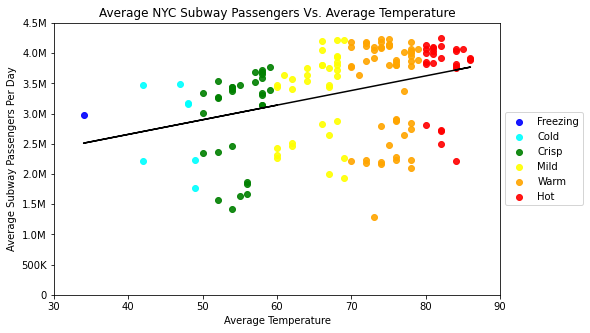

In [30]:
colors=['blue', 'cyan', 'green', 'yellow', 'orange', 'red']
labels = ['Freezing', 'Cold', 'Crisp', 'Mild', 'Warm', 'Hot']

fig, ax = plt.subplots(figsize = (10, 5))
for idx, val in enumerate(labels):    
    temp_df = merge_df[merge_df['CAT'] == val]    
    ax.scatter(        
        temp_df['TAVG'],        
        temp_df['POPULATION'],
        color=colors[idx],        
        alpha=0.9,        
        label=labels[idx]   
        
    )
    
z = np.polyfit(merge_df['TAVG'], merge_df['POPULATION'], 1)
print(z)
p = np.poly1d(z)  
ax.plot(merge_df['TAVG'], p(merge_df['TAVG']), c='black')

ax.set_xlabel("Average Temperature")
ax.set_ylabel("Average Subway Passengers Per Day")
ax.set_title("Average NYC Subway Passengers Vs. Average Temperature")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xticks(np.arange(30,100,10)) 
ax.set_yticks(np.arange(0,5000000,500000)) 
ax.yaxis.set_major_formatter(tik.FuncFormatter(format_tick))

The merged dataframe is then grouped by the category and the mean population movement is found for specific temperature ranges.

In [31]:
merge_df = merge_df.groupby('CAT', as_index = False)[['POPULATION']].mean().round(0).sort_values('POPULATION')
merge_df['POPULATION'] = merge_df['POPULATION'].astype('int')
print(merge_df)

        CAT  POPULATION
0      Cold     2785460
2  Freezing     2983087
1     Crisp     2990172
4      Mild     3320742
5      Warm     3460349
3       Hot     3720107


Here the mean population movement is plotted in a bar graph to show a trend of larger population movements with higher temperatures.

(2983087, 2785460, 2990172, 3320742, 3460349, 3720107)


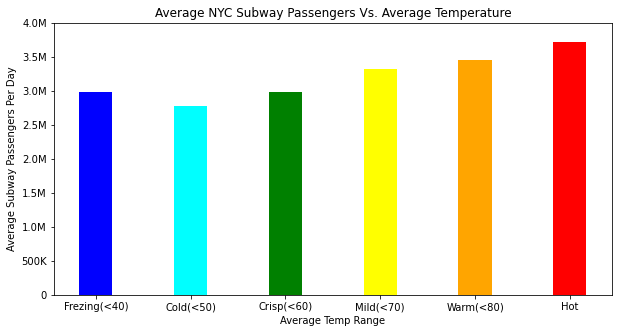

In [32]:
labels = ['Frezing(<40)', 'Cold(<50)', 'Crisp(<60)', 'Mild(<70)', 'Warm(<80)', 'Hot']
height = (merge_df.iloc[1,1],merge_df.iloc[0,1],merge_df.iloc[2,1],merge_df.iloc[3,1],merge_df.iloc[4,1],merge_df.iloc[5,1])
width = 0.35 
print(height)

fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(labels, height, width, color=['blue', 'cyan', 'green', 'yellow', 'orange', 'red'])

ax.set_xlabel("Average Temp Range")
ax.set_ylabel("Average Subway Passengers Per Day")
ax.set_title("Average NYC Subway Passengers Vs. Average Temperature")
ax.set_yticks(np.arange(0,4500000,500000)) 
ax.yaxis.set_major_formatter(tik.FuncFormatter(format_tick))
plt.savefig('movement_by_temp.png')

#ax.ticklabel_format(axis = 'y', style='plain')
#ax.get_yaxis().set_major_formatter(tik.FuncFormatter(lambda x, p: format(int(x), ',')))